## INST414 | Assignment 4 - Module 4 | Daniel Hernandez Gonzalez

In [104]:
# Pandas, we all love them. 
import pandas as pd

#spotify tools.
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Tools for making calculations
from sklearn.cluster import KMeans
import numpy as np

# Graphing data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Authenticating with Spotify API

In [3]:
# Authentication keys, taken out from my final push.
client_id = '85b32a4fe99f44db9d9665c3281bd8a5'
client_secret = '8598677237e74986ac35810334a418d3'
username = 'ks65h2anf54k24x4n4jvfx2hy'

# set up Spotify API credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Gathering data

#### Setting up API call

In [5]:
# Ver. 3.0 from what I started with this part of code. 
# It is more efficient to make a function to do this set of instructions instead of writing it more than once. 
def get_songs(genre, year):
    # set of 50 songs per API request
    query = f'genre:{genre}, year:{year}'
    limit = 50          # This is a place holder for adding to the offset after the first iteration bellow. 
    offset = 0          # This value indicated how many items the API call will skip before returning tracks
    top_songs = []      # List of all songs

    # Spotify API calls for each set of 50 songs
    for i in range(4):
        results = sp.search(q=query, type='track', limit=limit, offset=offset)      # The actuall API call.
        top_songs += results['tracks']['items']                                     # Feeds songs back into top_songs
        offset += limit                                                             # interger for how many songs the next iteration skips before capturing data 

    return top_songs


In [6]:
# Checking output until I 200 total items
testing = get_songs('rap', '2022')

#testing items
track_num = 0
for i in range(5):
    print(testing[track_num]["name"])
    track_num += 1

Just Wanna Rock
Kill Bill
Creepin' (with The Weeknd & 21 Savage)
Rich Flex
Superhero (Heroes & Villains) [with Future & Chris Brown]


#### Gathering top 200 songs from various years for the following genres. 

In [8]:
# I chose specific genres based on the genres shown on Spotify's platform and a few that I am interested in. Genre page: https://open.spotify.com/genre/hub-browse-grid
genre_list = ['rap', 'pop', 'house', 'country', 'rock', 'soul', 'inde', 'punk', 'corrido', 'banda']

# These are the years I will be assessing. There is no particular reason why I chose to go back in increments of two. I think more distance could yield better insights. 
years = [2022, 2020, 2018, 2016, 2014, 2007]

# Creating an empty DataFrame with columns.
songs_df = pd.DataFrame(columns=['track_id', 'track_name', 'artist_name', 'year', 'genre', 'tempo', 'popularity', 'acousticness', 'danceability', 'energy', 'loudness'])


In [9]:
# Iterating over the years and genres to add data into songs_df
for year in years:

    for genre in genre_list:
        genre_songs = get_songs(genre, year)

        for track in genre_songs:
            # All of the data I can pull from the sp.search call 
            track_id = track['id']
            artist_names = [artist['name'] for artist in track['album']['artists']]
            artist_name = ', '.join(artist_names)
            track_name = track['name']
            popularity = track['popularity']
            genre = genre

            # Spotify API call to get additional audio features
            audio_features = sp.audio_features(track_id)

            if audio_features: # If this section was returned.
                acousticness = audio_features[0]['acousticness']
                danceability = audio_features[0]['danceability']
                energy = audio_features[0]['energy']
                tempo = audio_features[0]['tempo']
                loudness = audio_features[0]['loudness']
                
            else:              # Incase any missing values. Will drop these rows after.
                acousticness, danceability, energy, tempo = None, None, None, None

            # adding all data that was pulled into songs_df
            songs_df.loc[len(songs_df)] = [track_id, track_name, artist_name, year, genre, tempo, popularity, acousticness, danceability, energy, loudness]
            

In [10]:
# Checking shape of df
print(f"{songs_df.shape}\n")

(12000, 11)



### Exporting the data frame as a csv. 

This section made taking breaks easier. I was needing to keep running the code above and wait 20 full minutes before working again. 

In [11]:
# Exporting songs_df as a CSV file.
songs_df.to_csv('songs.csv', index=False)

In [91]:
# Reading in the CSV as a new df
all_songs_df = pd.read_csv('songs.csv')
all_songs_df

,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness
0,4FyesJzVpA39hbYvcseO2d,Just Wanna Rock,Lil Uzi Vert,2022,rap,150.187,91,0.0652,0.486,0.545,-7.924
1,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,2022,rap,88.980,94,0.0521,0.644,0.735,-5.747
2,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.4170,0.715,0.620,-6.005
3,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,"Drake, 21 Savage",2022,rap,153.150,91,0.0503,0.561,0.520,-9.342
4,0vjeOZ3Ft5jvAi9SBFJm1j,Superhero (Heroes & Villains) [with Future & C...,Metro Boomin,2022,rap,116.622,90,0.1520,0.526,0.606,-5.300
...,...,...,...,...,...,...,...,...,...,...,...
11995,6wJhHptYOSIqMlS5uH06M8,Linda Güerita,Banda El Recodo,2007,banda,147.183,31,0.5460,0.691,0.780,-4.209
11996,3ylMOJE3voNOIa85rQr5In,Sin Una Salida,El Trono de Mexico,2007,banda,144.567,24,0.5020,0.623,0.731,-3.357
11997,14xEDvISNBU6oyCT5jL0nR,La Huella De Mis Besos,Julio Chaidez,2007,banda,97.769,25,0.6570,0.778,0.487,-5.323
11998,5TlwryJMoMVd8P0gcNB8iK,Chaiyo Nava,El As De La Sierra,2007,banda,137.278,28,0.1590,0.773,0.378,-7.325


# Data cleaning

In [14]:
# Showing shape and null values.
print(f"{all_songs_df.shape}\n")
print(all_songs_df.isna().sum())

# Drops NA values
#songs_df.dropna(inplace=True)
#print(f"\n{songs_df.shape}")

# I was getting errors in pervious versions of my code. I kept this incase I wanted to come back and test different genres. 

(12000, 11)

track_id        0
track_name      0
artist_name     0
year            0
genre           0
tempo           0
popularity      0
acousticness    0
danceability    0
energy          0
loudness        0
dtype: int64


In [16]:
# Dataframe size before cleaning
print(f'table size before cleaning: {all_songs_df.shape}') 

# Dropping duplicate track_id
all_songs_df = all_songs_df.drop_duplicates(subset=['track_id'])

# Dataframe size after cleaning and displaying table
print(f'\ntable size after cleaning: {all_songs_df.shape}\n') 
all_songs_df

table size before cleaning: (12000, 11)

table size after cleaning: (10796, 11)



,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness
0,4FyesJzVpA39hbYvcseO2d,Just Wanna Rock,Lil Uzi Vert,2022,rap,150.187,91,0.0652,0.486,0.545,-7.924
1,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,2022,rap,88.980,94,0.0521,0.644,0.735,-5.747
2,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.4170,0.715,0.620,-6.005
3,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,"Drake, 21 Savage",2022,rap,153.150,91,0.0503,0.561,0.520,-9.342
4,0vjeOZ3Ft5jvAi9SBFJm1j,Superhero (Heroes & Villains) [with Future & C...,Metro Boomin,2022,rap,116.622,90,0.1520,0.526,0.606,-5.300
...,...,...,...,...,...,...,...,...,...,...,...
11992,462GGEdsO7iow2sJOWjuPX,Leonardo Reyes,La Original Banda El Limón de Salvador Lizárraga,2007,banda,205.605,30,0.5620,0.398,0.589,-2.404
11994,0QKyb4OfXl0P9vqdUMGokR,Culpable o No,El Flaco Elizalde,2007,banda,148.051,32,0.5140,0.719,0.453,-8.279
11995,6wJhHptYOSIqMlS5uH06M8,Linda Güerita,Banda El Recodo,2007,banda,147.183,31,0.5460,0.691,0.780,-4.209
11996,3ylMOJE3voNOIa85rQr5In,Sin Una Salida,El Trono de Mexico,2007,banda,144.567,24,0.5020,0.623,0.731,-3.357


In [17]:
# pulling the top songs from each genre and sorting by popularity for better view.
top_songs_by_genre = all_songs_df.sort_values('popularity', ascending=False).groupby('genre').head(1)
top_songs_by_genre

,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness
202,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),"Rema, Selena Gomez",2022,pop,106.999,96,0.38200,0.801,0.806,-5.206
2,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.41700,0.715,0.620,-6.005
1600,1lRtH4FszTrwwlK5gTSbXO,AMG,"Natanael Cano, Peso Pluma, Gabito Ballesteros",2022,corrido,136.175,95,0.15200,0.772,0.730,-6.657
7000,3xKsf9qdS1CyvXSMEid6g8,Pink + White,Frank Ocean,2016,soul,159.940,88,0.66700,0.545,0.545,-7.362
408,4zN21mbAuaD0WqtmaTZZeP,Ferrari,"James Hype, Miggy Dela Rosa",2022,house,125.004,85,0.01270,0.847,0.690,-7.877
2801,5hM5arv9KDbCHS0k9uqwjr,Borderline,Tame Impala,2020,rock,97.960,84,0.04060,0.621,0.873,-3.067
1801,5kpxVMDvYGRmNqawPqDTYR,JGL,"La Adictiva, Luis R Conriquez",2022,banda,112.852,83,0.55000,0.702,0.586,-5.317
4600,6foY66mWZN0pSRjZ408c00,Whiskey Glasses,Morgan Wallen,2018,country,149.959,83,0.36900,0.614,0.680,-4.580
5401,1SHB1hp6267UK9bJQUxYvO,Судно (Борис Рижий),Molchat Doma,2018,punk,159.992,75,0.69700,0.484,0.750,-4.176
1200,21rpBPAlXAvBavvu5kCQzs,After Midnight,Phoenix,2022,inde,100.010,61,0.00245,0.618,0.811,-6.654


#### As a disclaimer, I am aware that this is alphabetically the top song per genre based on sorting by popularity. 

# Finding the best K value

### Elbow method

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

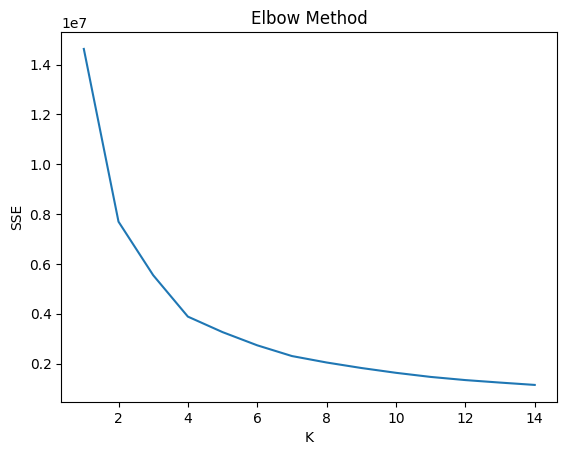

In [96]:
k_values = range(1, 15)

# Calculating the SSE (sum of squared errors) for each value of k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=25)
    kmeans.fit(all_songs_df[['tempo', 'popularity']])
    sse.append(kmeans.inertia_)

# Plot the SSE for each k value
plt.plot(k_values, sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=10, random_state=25)
kmeans.fit(all_songs_df[['tempo', 'popularity']])
labels = kmeans.labels_
all_songs_df['cluster'] = labels

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [121]:
# Adding custom colors
colors = ['#a9a9a9', '#3cb44b', '#000075', '#f58231', '#2E4053', '#1B4F72', '#2ECC71', '#F1C40F', '#000000', '#E74C3C']
cmap = ListedColormap(colors)

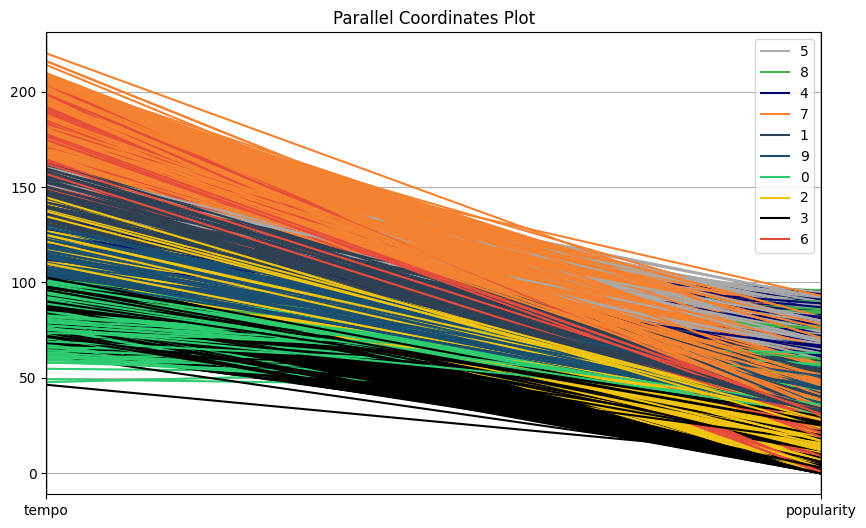

In [125]:
# Parallel coordinates plot
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(all_songs_df[['tempo', 'popularity', 'cluster']], 'cluster', colormap=cmap)
plt.title('Parallel Coordinates Plot')
plt.show()

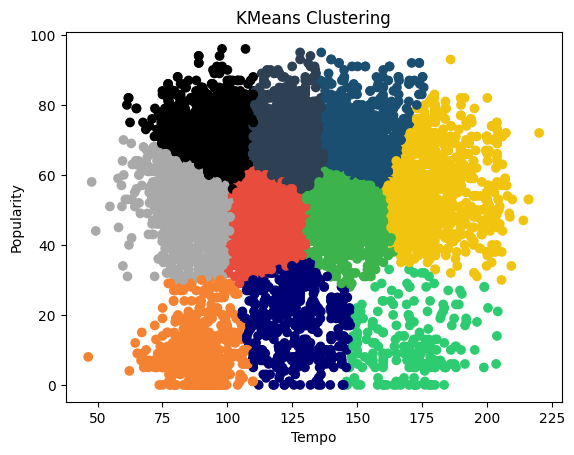

In [122]:
# Scatter plot with custom colors
plt.scatter(all_songs_df['tempo'], all_songs_df['popularity'], c=labels, cmap=cmap)
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('KMeans Clustering')
plt.show()

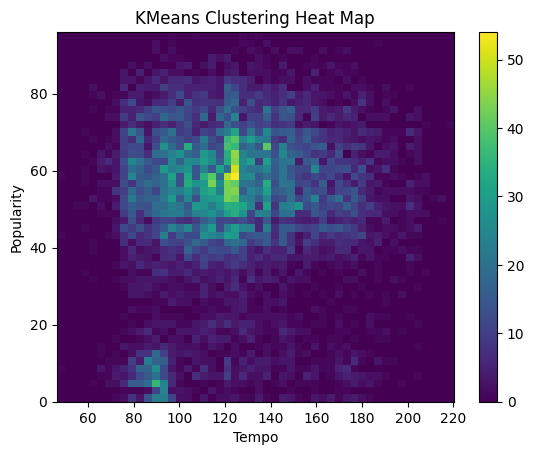

In [123]:
# Heatmap with a 2d histogram
plt.hist2d(all_songs_df['tempo'], all_songs_df['popularity'], bins=50, cmap='viridis')

# Adds colorbar to the side
plt.colorbar()

# Adds axis labels and title
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('KMeans Clustering Heat Map')

plt.show()

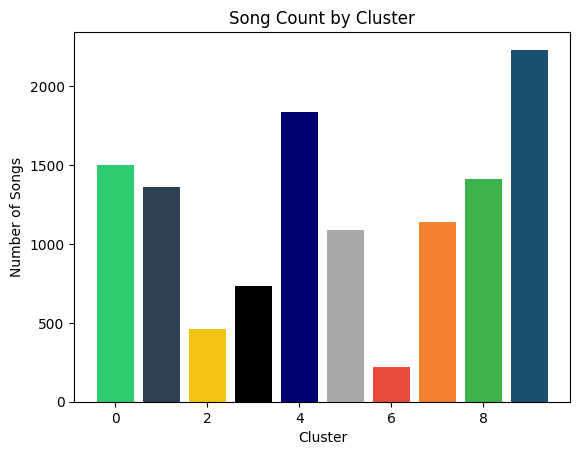

In [124]:
# Counting the number of songs in each cluster
cluster_counts = {}
for label in labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# Bar chart
plt.bar(cluster_counts.keys(), cluster_counts.values(), color=cmap(range(10)))
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Song Count by Cluster')
plt.show()


/---------------------Everything bellow here is from past work I did, I might use this to compare datasets in final medium post---------------------\

# Distance calculations

### My goal: 
    - Grab the top songs from each genre. 
    - Calculate Euclidean distance between songs.
    - print top 10 closest songs

In [18]:
def closest_tracks(track_id, songs_df):
    # Extracting audio features for the provided track
    audio_features = songs_df.loc[songs_df['track_id'] == track_id, ['tempo', 'acousticness', 'danceability', 'energy', 'loudness']]

    # Calculating Euclidean distance between the provided track and all other tracks
    songs_df.loc[:,'distance'] = np.sqrt((songs_df['tempo'] - audio_features['tempo'].iloc[0])**2 +
                                    (songs_df['danceability'] - audio_features['danceability'].iloc[0])**2 +
                                    (songs_df['acousticness'] - audio_features['acousticness'].iloc[0])**2 +
                                    (songs_df['energy'] - audio_features['energy'].iloc[0])**2 + 
                                    (songs_df['loudness'] - audio_features['loudness'].iloc[0])**2)

    # Sorting the DataFrame by distance in ascending order
    songs_df = songs_df.sort_values('distance')

    # Adding the input track back to the top of the DataFrame
    input_track = songs_df.loc[songs_df['track_id'] == track_id]

    # Adding closest tracks to new dataframe
    closest_tracks = pd.concat([input_track, songs_df.loc[((songs_df['track_name'] != input_track['track_name'].iloc[0]) |
                                        (songs_df['artist_name'] != input_track['artist_name'].iloc[0])) &
                                        (songs_df['track_id'] != input_track['track_id'].iloc[0])].head(10)])

    # Resetting the index and dropping old index to avoid too many numbers. 
    closest_tracks = closest_tracks.reset_index(drop=True)

    return closest_tracks

### What are the closest songs in comparison to the top rap song?

In [19]:
rap_id = '2dHHgzDwk4BJdRwy9uXhTO' # "'Creepin' (with The Weeknd & 21 Savage)"
closest_rap = closest_tracks(rap_id, songs_df)
closest_rap

,track_id,track_name,artist_name,year,genre,tempo,popularity,acousticness,danceability,energy,loudness,distance
0,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,rap,97.950,96,0.4170,0.715,0.620,-6.005,0.000000
1,4ZUpTMKPYFTfJqamWFU9Zv,IDGAF (with blackbear),BoyWithUke,2022,rap,97.975,75,0.4270,0.782,0.728,-5.930,0.150010
2,4uk8GguFehn7djGvFJTUUT,Enloquecido,Grupo Arriesgado,2022,corrido,98.053,70,0.2500,0.784,0.734,-6.007,0.237190
3,3T5F6ulZvDzBQwq3wS31xZ,Enloquecido,Grupo Arriesgado,2022,corrido,98.052,71,0.2420,0.784,0.732,-6.006,0.241526
4,5Ei8EK2uXNkqqVSe2QYsFp,Que Te Vaya Bien,Julión Álvarez y su Norteño Banda,2022,banda,97.990,76,0.2370,0.667,0.467,-5.906,0.263655
5,08r6DEsJa4vwivDUihvYSo,Siempre Apasionado,Oasis 4you,2007,corrido,98.009,20,0.2110,0.782,0.657,-5.809,0.300318
6,1kJXYVVUu7o3B9gaJpoxjm,Que Te Vaya Bien,Julión Álvarez y su Norteño Banda,2022,banda,97.972,74,0.2300,0.665,0.469,-5.809,0.314913
7,7LClq5PzM22y7EqBXhM2gi,Train de nuit - 2005,Droogz Brigade,2020,inde,97.970,5,0.1140,0.699,0.650,-6.183,0.353623
8,5VZ6lZcU0FN7uwL8GgwunV,Avenir en suspens,Zakariens,2007,inde,97.871,3,0.2200,0.608,0.856,-6.134,0.358937
9,3ruoIF2UnoXdzK8mR61ebq,Rich Nigga Shit (feat. Young Thug),"21 Savage, Metro Boomin",2020,rap,97.974,80,0.3490,0.825,0.733,-5.625,0.417695


### What are the closest songs in comparison to the top corrido song?

In [99]:
corrido_id = '1lRtH4FszTrwwlK5gTSbXO' # "AMG"
closest_corrido = closest_tracks(corrido_id, songs_df)
closest_corrido

,track_id,track_name,artist_name,genre,tempo,popularity,acousticness,danceability,energy,loudness,distance
0,1lRtH4FszTrwwlK5gTSbXO,AMG,"Natanael Cano, Peso Pluma, Gabito Ballesteros",corrido,136.175,95,0.1520,0.772,0.730,-6.657,0.000000
1,3gfSH9aYZbyGjdmbeoWliw,Siempre Pendientes,"Peso Pluma, Luis R Conriquez",corrido,135.929,87,0.3310,0.774,0.748,-7.086,0.526238
2,5gVCfYmQRPy1QJifP8f5gg,Fall In Love,Bailey Zimmerman,pop,135.962,80,0.4510,0.524,0.643,-6.055,0.752494
3,1wLNEMiUzwvRZz9XHCXhAE,Fifth of May,Zach Bryan,country,136.728,72,0.3910,0.596,0.544,-7.039,0.757909
4,1ENsFKcyksWFyXNQlWCI1c,Mirate Nomas (En Vivo),Ulices Chaidez,banda,135.836,55,0.5820,0.653,0.375,-7.060,0.776155
5,6AhwAWzSlISc5ZvGonkgdN,Playing God,Polyphia,rock,137.060,67,0.0395,0.601,0.789,-6.822,0.925110
6,5VfkfKTTo5BRKqHwfENF0V,Míranos Ahora,Calibre 50,corrido,135.832,70,0.6510,0.680,0.439,-5.909,1.009603
7,46FdwGMcgz6gik4RCpWBAW,Los Collares,"Oscar Maydon, El Padrinito Toys",corrido,136.724,86,0.2080,0.645,0.712,-5.787,1.038215
8,45bfH0GZvUyujIBiKRhXso,B.O.T.A. (Baddest Of Them All),"Eliza Rose, Interplanetary Criminal",house,136.981,67,0.0671,0.756,0.962,-7.526,1.210820
9,39JofJHEtg8I4fSyo7Imft,B.O.T.A. (Baddest Of Them All) - Edit,"Eliza Rose, Interplanetary Criminal",house,137.001,82,0.1640,0.736,0.906,-7.589,1.258299


### What are the closest songs in comparison to the top Banda song?

In [100]:
banda_id = '5kpxVMDvYGRmNqawPqDTYR' # "JGL"
closest_banda = closest_tracks(banda_id, songs_df)
closest_banda

,track_id,track_name,artist_name,genre,tempo,popularity,acousticness,danceability,energy,loudness,distance
0,5kpxVMDvYGRmNqawPqDTYR,JGL,"La Adictiva, Luis R Conriquez",banda,112.852,84,0.550000,0.702,0.586,-5.317,0.000000
1,0RstZCli3DcyY1LJq38P4b,El Chaman,Gabito Ballesteros,corrido,112.998,69,0.260000,0.814,0.575,-5.348,0.345025
2,42cVZAhX13JCHwrvlfqLcB,When You Lose Someone,The Dip,soul,112.452,53,0.365000,0.751,0.498,-5.766,0.637159
3,1xTYy3K3hiTcoZfoD7culn,Say You Want Me - Single Version,Masego,soul,112.978,63,0.190000,0.884,0.658,-5.940,0.756249
4,6DL44bNYvHzr1E58BAx5zx,Horseshit on Route 66,The Garden,punk,112.328,49,0.028300,0.498,0.978,-5.115,0.884777
5,66MvNxKQGPQS0AUeaoYlcn,hair out,Stand Atlantic,punk,112.987,53,0.000488,0.678,0.896,-4.685,0.903487
6,5Tg3TbTftDrjmQORfsqw5m,Enamorado Y Feliz,La Adictiva,banda,113.590,50,0.377000,0.653,0.434,-5.895,0.966521
7,5DAkzBJ48N7z6lwY4eZ0PP,Artefact,Phoenix,inde,112.025,53,0.007840,0.705,0.636,-5.734,1.074367
8,11kskoMyNDumaR30CI6rRv,Half Of Me,Thomas Rhett,country,111.995,69,0.006830,0.575,0.842,-5.058,1.085462
9,69w5X6uTrOaWM32IetSzvO,Daydreaming,Harry Styles,pop,113.971,77,0.311000,0.707,0.811,-5.298,1.166316
